In [48]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [49]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [50]:
# add the latitudes and logitudes to a list
coordinates = list(lat_lngs)

In [51]:
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count.
len(cities)

614

In [52]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

In [53]:
# Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0132a1a5560f78db4653dca3b1034416


In [54]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 35.78,
  'feels_like': 31.51,
  'temp_min': 31.57,
  'temp_max': 39.11,
  'pressure': 1011,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 360, 'gust': 15.99},
 'clouds': {'all': 82},
 'dt': 1638222498,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1638186725,
  'sunset': 1638220417},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [55]:
# Get the JSON data.
boston_data = city_weather.json()

In [56]:
boston_data['sys']['country']

'US'

In [57]:
boston_data['dt']

1638222498

In [58]:
lat = boston_data['coord']['lat']
lon = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
min_temp = boston_data['main']['temp_min']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lon, max_temp, min_temp, humidity, clouds, wind)

42.3584 -71.0598 39.11 31.57 54 82 5.01


In [59]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [60]:
# Initialize counters and an empty list that will hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------


In [61]:
# Create counters
record_count = 1
set_count = 1

In [62]:
# Loop through the cities list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities:
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse Out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y, %m, %d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | lashio
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | erenhot
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | raton
Processing Record 11 of Set 1 | ranong
Processing Record 12 of Set 1 | kosonsoy
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | canutama
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | sorvag
City not found. Skipping...
Processing Record 18 of Set 1 | longlac
City not found. Skipping...
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | andenes
Processing Record 21 of Set 1 | mandera
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | skjold
Processing R

Processing Record 34 of Set 4 | roebourne
Processing Record 35 of Set 4 | bundaberg
Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | grand-santi
Processing Record 38 of Set 4 | angol
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | vredendal
Processing Record 41 of Set 4 | hobart
Processing Record 42 of Set 4 | novaya zaimka
Processing Record 43 of Set 4 | mattru
Processing Record 44 of Set 4 | havoysund
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | tanza
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | akyab
Processing Record 49 of Set 4 | dovolnoye
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | fiditi
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | tuscaloosa
Processing Record 5 of Set 5 | hamilton
Processi

Processing Record 25 of Set 8 | glace bay
Processing Record 26 of Set 8 | sosva
Processing Record 27 of Set 8 | kutum
Processing Record 28 of Set 8 | jaciara
Processing Record 29 of Set 8 | muros
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | tocopilla
Processing Record 33 of Set 8 | evans
Processing Record 34 of Set 8 | alotau
City not found. Skipping...
Processing Record 35 of Set 8 | jiuquan
Processing Record 36 of Set 8 | chibuto
Processing Record 37 of Set 8 | san pancrazio salentino
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | saint-leu
Processing Record 40 of Set 8 | vilhena
Processing Record 41 of Set 8 | bhopal
Processing Record 42 of Set 8 | bargal
City not found. Skipping...
Processing Record 43 of Set 8 | oxford
Processing Record 44 of Set 8 | manjeshwar
Processing Record 45 of Set 8 | kupang
Processing Record 46 of Set 8 | pailon
Processing Rec

Processing Record 15 of Set 12 | kirakira
Processing Record 16 of Set 12 | joaima
Processing Record 17 of Set 12 | sidrolandia
Processing Record 18 of Set 12 | sayyan
Processing Record 19 of Set 12 | san luis
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | jalu
Processing Record 22 of Set 12 | bulgan
Processing Record 23 of Set 12 | trincomalee
Processing Record 24 of Set 12 | deputatskiy
Processing Record 25 of Set 12 | honningsvag
Processing Record 26 of Set 12 | manono
Processing Record 27 of Set 12 | griffith
Processing Record 28 of Set 12 | senno
Processing Record 29 of Set 12 | pahrump
Processing Record 30 of Set 12 | cimislia
Processing Record 31 of Set 12 | sri aman
Processing Record 32 of Set 12 | paracuru
Processing Record 33 of Set 12 | san quintin
Processing Record 34 of Set 12 | itaituba
Processing Record 35 of Set 12 | samarai
Processing Record 36 of Set 12 | dourbali
Processing Record 37 of Set 12 | tigil
Processing Record 38 of Set 12 | v

In [63]:
len(city_data)

565

In [64]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,68.07,88,89,7.54,ZA,"2021, 11, 29 21:50:52"
1,Lashio,22.9333,97.7500,54.27,93,55,2.33,MM,"2021, 11, 29 21:52:32"
2,Dikson,73.5069,80.5464,-14.39,96,100,16.24,RU,"2021, 11, 29 21:52:33"
3,New Norfolk,-42.7826,147.0587,66.65,66,22,1.01,AU,"2021, 11, 29 21:52:33"
4,Erenhot,43.6475,111.9767,15.40,64,0,10.11,CN,"2021, 11, 29 21:52:34"
5,Busselton,-33.6500,115.3333,57.04,62,30,9.73,AU,"2021, 11, 29 21:48:43"
6,East London,-33.0153,27.9116,68.20,87,46,6.42,ZA,"2021, 11, 29 21:48:04"
7,Ushuaia,-54.8000,-68.3000,44.26,61,40,21.85,AR,"2021, 11, 29 21:52:34"
8,Kodiak,57.7900,-152.4072,36.91,93,90,24.16,US,"2021, 11, 29 21:48:08"
9,Raton,36.9034,-104.4391,71.06,18,1,4.61,US,"2021, 11, 29 21:52:35"


In [65]:
# Reorder the columns to make it easier to read
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,"2021, 11, 29 21:50:52",-33.5906,26.8910,68.07,88,89,7.54
1,Lashio,MM,"2021, 11, 29 21:52:32",22.9333,97.7500,54.27,93,55,2.33
2,Dikson,RU,"2021, 11, 29 21:52:33",73.5069,80.5464,-14.39,96,100,16.24
3,New Norfolk,AU,"2021, 11, 29 21:52:33",-42.7826,147.0587,66.65,66,22,1.01
4,Erenhot,CN,"2021, 11, 29 21:52:34",43.6475,111.9767,15.40,64,0,10.11


In [66]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
# export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [67]:
# Extract the relevent data from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [68]:
# Import the time module
import time
# Get today's date in seconds
today = time.time()
today

1638223687.294517

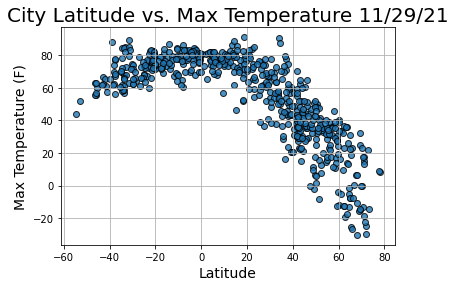

In [74]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

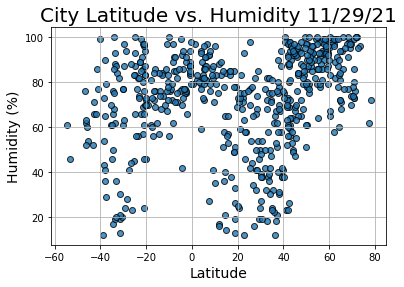

In [72]:
# Create a scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", alpha=0.8, linewidths=1,
           marker="o", label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"), fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

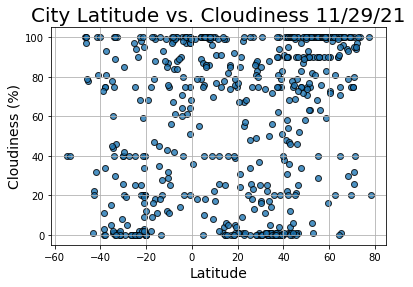

In [73]:
# Create a scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", alpha=0.8, linewidths=1,
           marker="o", label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"), fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

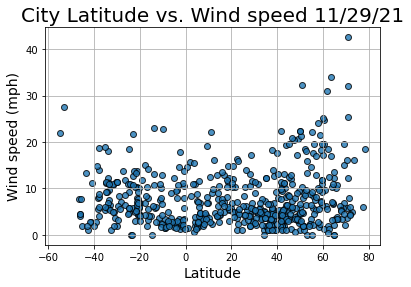

In [75]:
# Create a scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", alpha=0.8, linewidths=1,
           marker="o", label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind speed " + time.strftime("%x"), fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind speed (mph)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()